# Import libraries

In [1]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Data statistics

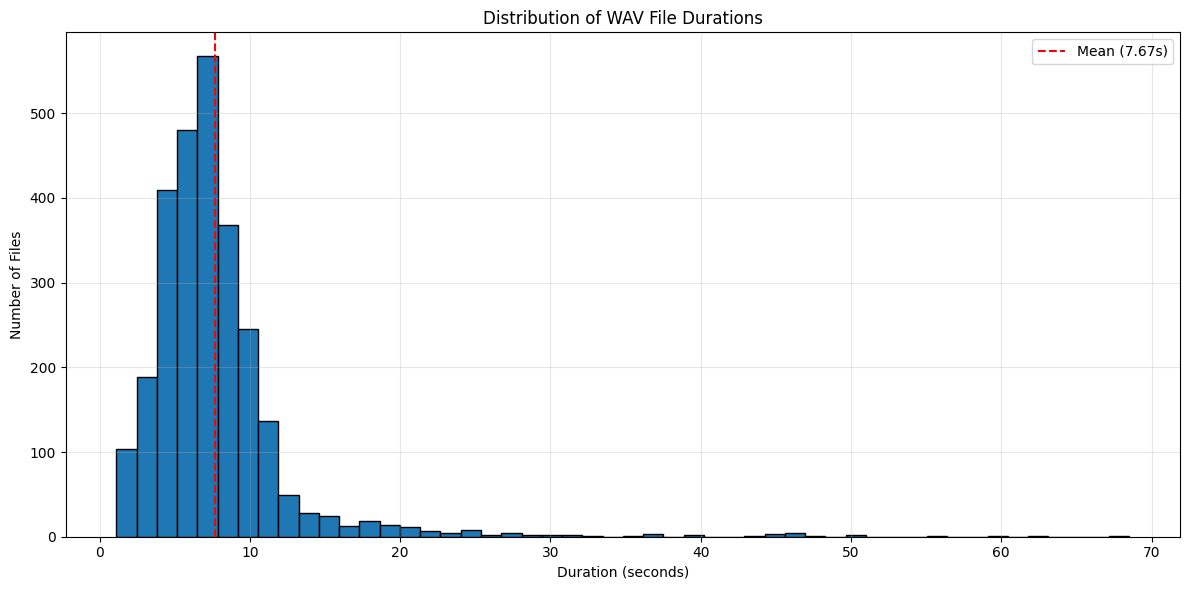

Number of WAV files: 2,710
Shortest audio duration: 1.11 seconds (File: tsync2_noon_99_186.wav)
Longest audio duration: 68.52 seconds (File: tsync2_noon_40_7902.wav)
Average audio duration: 7.67 seconds
Total duration: 20778.49 seconds (5.77 hours)


In [4]:
# Read all wav files in the directory
wav_dir = '../data/raw/TSync2/wav'
durations = []
file_paths = []

for wav_file in Path(wav_dir).glob('**/*.wav'):
   try:
       duration = librosa.get_duration(path=str(wav_file))
       durations.append(duration)
       file_paths.append(wav_file)
   except Exception as e:
       print(f"Error reading {wav_file}: {e}")

# Convert to numpy array for calculations
durations = np.array(durations)

# Calculate statistics
min_duration = np.min(durations)
max_duration = np.max(durations)
avg_duration = np.mean(durations)
total_duration = np.sum(durations)

# Find files with min/max duration
min_idx = np.argmin(durations)
max_idx = np.argmax(durations)
shortest_file = file_paths[min_idx].name
longest_file = file_paths[max_idx].name

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(durations, bins=50, edgecolor='black')
plt.axvline(x=avg_duration, color='r', linestyle='--', label=f'Mean ({avg_duration:.2f}s)')

plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Files')
plt.title('Distribution of WAV File Durations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print(f"Number of WAV files: {len(durations):,}")
print(f"Shortest audio duration: {min_duration:.2f} seconds (File: {shortest_file})")
print(f"Longest audio duration: {max_duration:.2f} seconds (File: {longest_file})")
print(f"Average audio duration: {avg_duration:.2f} seconds")
print(f"Total duration: {total_duration:.2f} seconds ({total_duration/3600:.2f} hours)")